In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Data_Sets/

/content/drive/MyDrive/Data_Sets


In [3]:
import os

In [5]:
!pip install ts2vg cairocffi igraph
!pip install pycairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.3 MB/s 
     |████████████████████████████████| 69 kB 6.9 MB/s 
     |████████████████████████████████| 3.3 MB 42.3 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=91b6176309fc9a3b027a5b5ead4381c268903c735c75c5b6765f8a1eacbe4861
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo whic

In [6]:
from ts2vg import NaturalVG, HorizontalVG
import numpy as np
import igraph
import cairocffi
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
col = ["Method", "Subject", "Accelerometer Axis", "Average Degree",
            "Network Diameter", "Average Path Length", "Activity","Sensor"]
final_table = pd.DataFrame(columns = col)
activities = ["walking", "running", "climbingup", "climbingdown"]
subjects = list(range(1, 16))
axis = list("xyz")
sensors = ["chest", "forearm", "head", "shin", "thigh", "upperarm", "waist"]
methods = [NaturalVG, HorizontalVG]

In [8]:
for subject in subjects:
  for activity in activities:
    for sensor in sensors:
      try:
       foldername = "acc_"+activity+"_data_"+str(subject)
       filename = "acc_"+activity+"_"+sensor+".csv"
       print(foldername," - ", sensor)
       task_1 = pd.read_csv(foldername+"/"+filename)
       for ax in axis:
         for method in methods:
           for sensor in sensors: 
             g = method()
             g.build(task_1["attr_"+ax][1000:2024])
             ig = g.as_igraph()
             result = [method.__name__, subject, ax.upper(), np.mean(ig.degree()), 
                     ig.diameter(), ig.average_path_length(), activity,sensor]
             new_d = dict(zip(col, result))
             final_table = final_table.append(new_d, ignore_index=True)
      except Exception:
          continue

acc_walking_data_1  -  chest
acc_walking_data_1  -  forearm
acc_walking_data_1  -  head
acc_walking_data_1  -  shin
acc_walking_data_1  -  thigh
acc_walking_data_1  -  upperarm
acc_walking_data_1  -  waist
acc_running_data_1  -  chest
acc_running_data_1  -  forearm
acc_running_data_1  -  head
acc_running_data_1  -  shin
acc_running_data_1  -  thigh
acc_running_data_1  -  upperarm
acc_running_data_1  -  waist
acc_climbingup_data_1  -  chest
acc_climbingup_data_1  -  forearm
acc_climbingup_data_1  -  head
acc_climbingup_data_1  -  shin
acc_climbingup_data_1  -  thigh
acc_climbingup_data_1  -  upperarm
acc_climbingup_data_1  -  waist
acc_climbingdown_data_1  -  chest
acc_climbingdown_data_1  -  forearm
acc_climbingdown_data_1  -  head
acc_climbingdown_data_1  -  shin
acc_climbingdown_data_1  -  thigh
acc_climbingdown_data_1  -  upperarm
acc_climbingdown_data_1  -  waist
acc_walking_data_2  -  chest
acc_walking_data_2  -  forearm
acc_walking_data_2  -  head
acc_walking_data_2  -  shin
acc_

In [9]:
final_table

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Sensor
0,NaturalVG,1,X,11.451172,10,4.441492,walking,chest
1,NaturalVG,1,X,11.451172,10,4.441492,walking,forearm
2,NaturalVG,1,X,11.451172,10,4.441492,walking,head
3,NaturalVG,1,X,11.451172,10,4.441492,walking,shin
4,NaturalVG,1,X,11.451172,10,4.441492,walking,thigh
...,...,...,...,...,...,...,...,...
17005,HorizontalVG,15,Z,3.962891,29,11.314474,climbingdown,head
17006,HorizontalVG,15,Z,3.962891,29,11.314474,climbingdown,shin
17007,HorizontalVG,15,Z,3.962891,29,11.314474,climbingdown,thigh
17008,HorizontalVG,15,Z,3.962891,29,11.314474,climbingdown,upperarm


In [10]:
def scatterplot(x,y,colors, title,data):
  plt.title(title)
  plt.scatter(data[x], data[y], c = colors)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

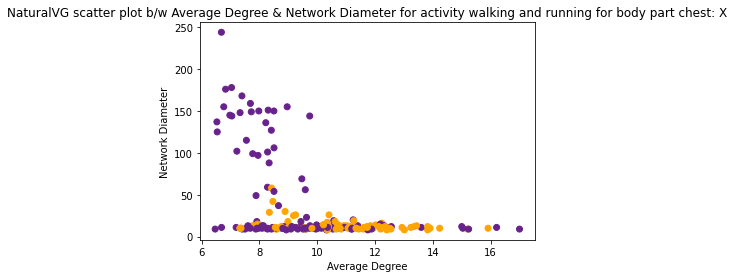

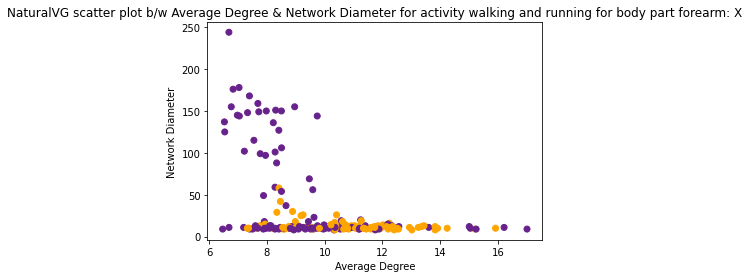

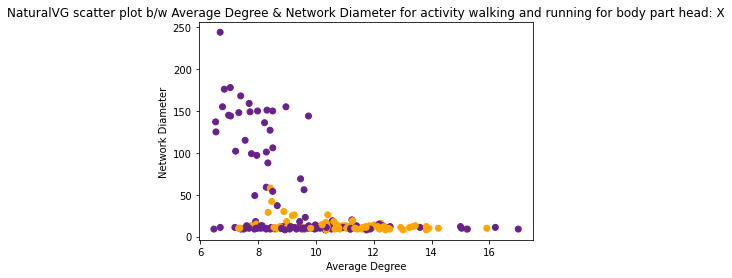

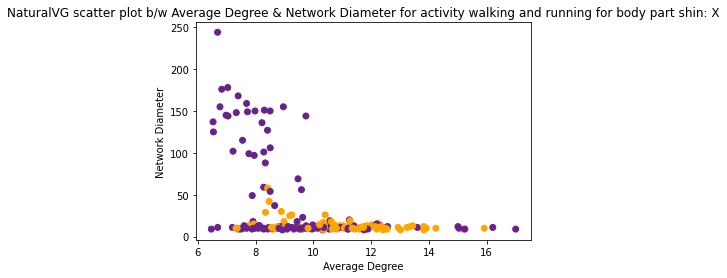

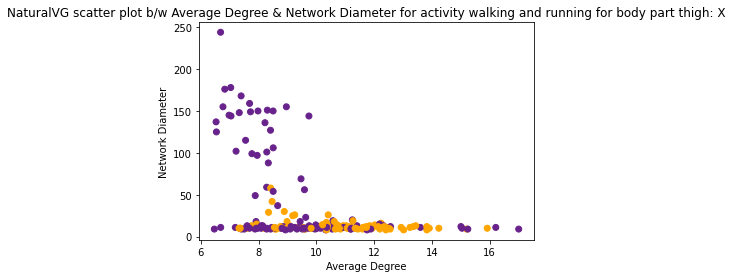

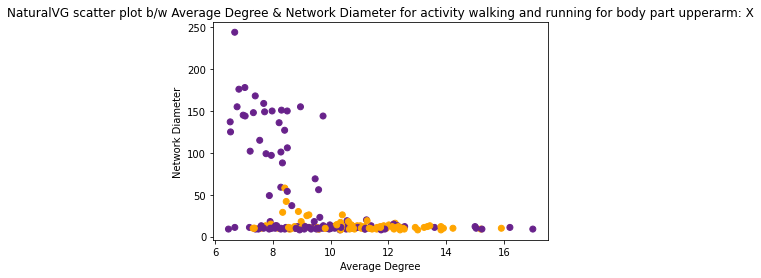

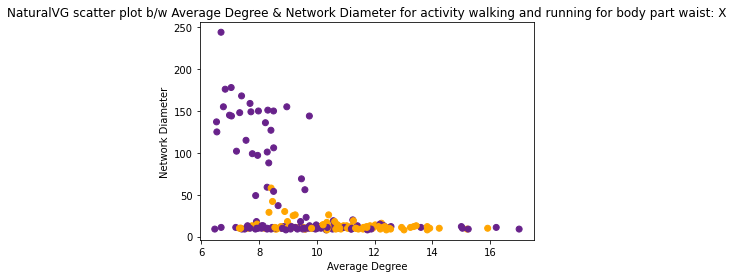

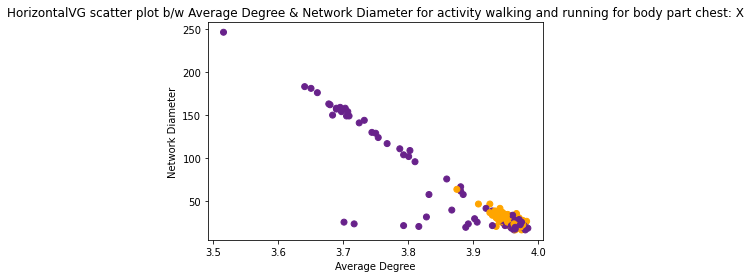

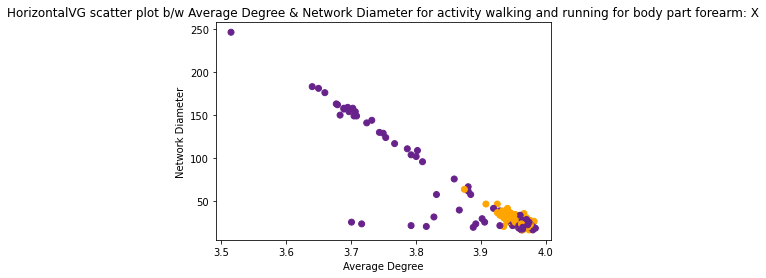

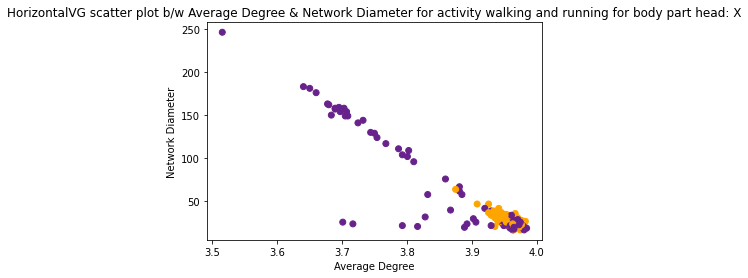

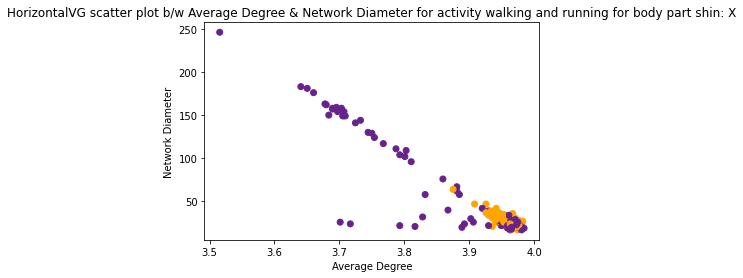

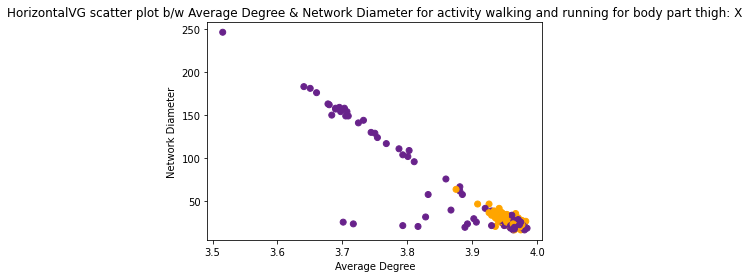

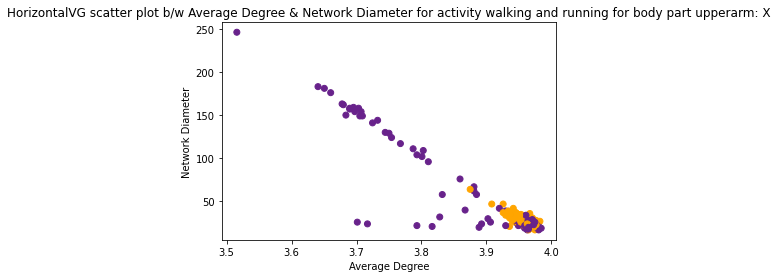

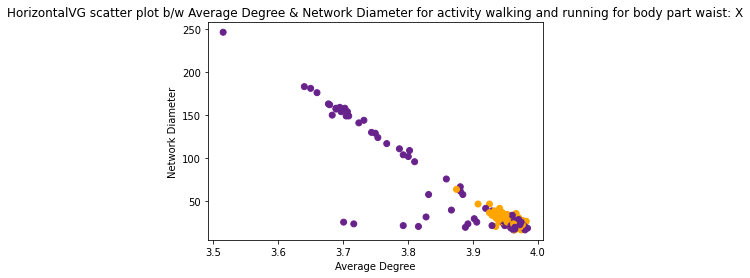

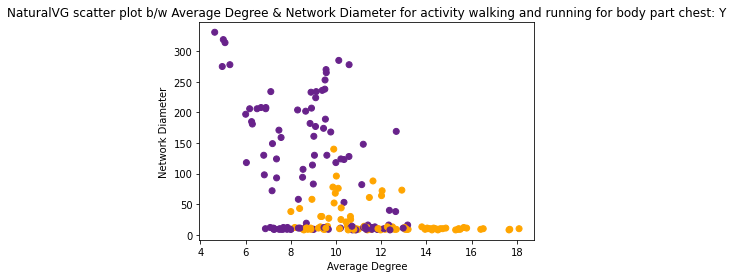

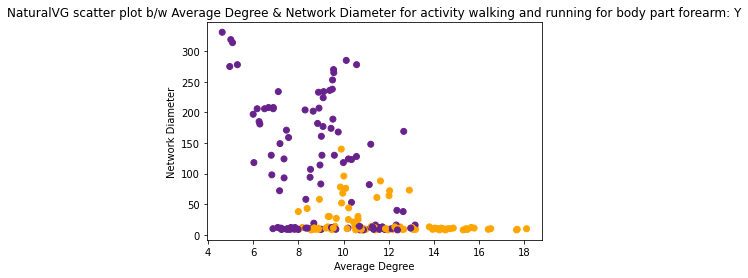

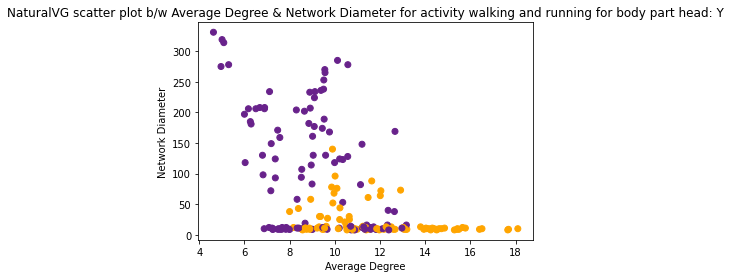

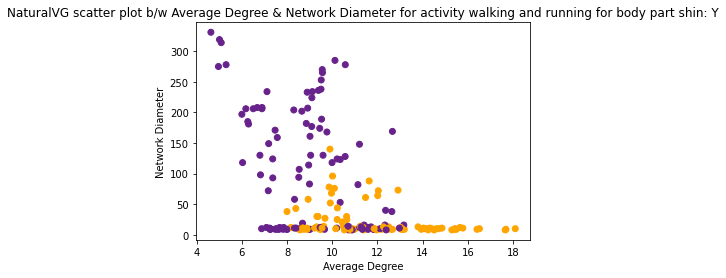

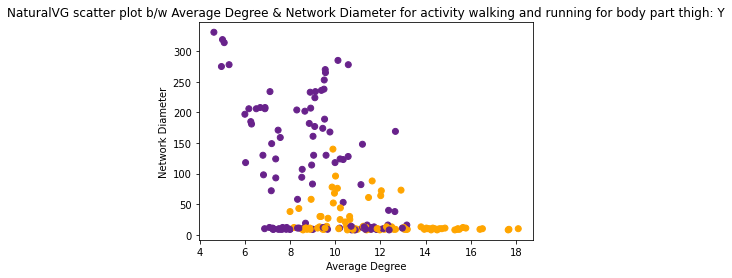

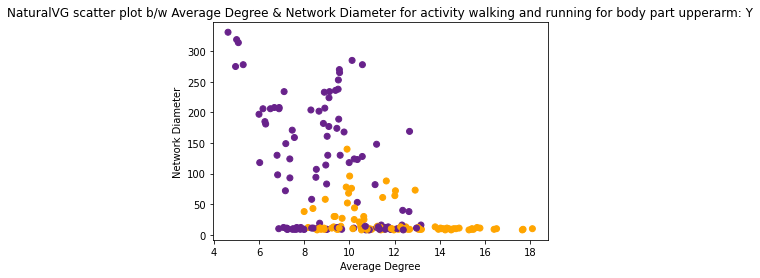

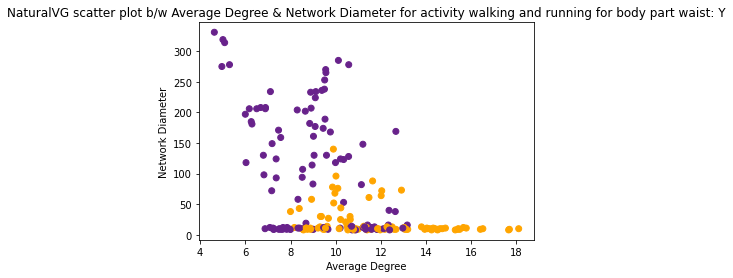

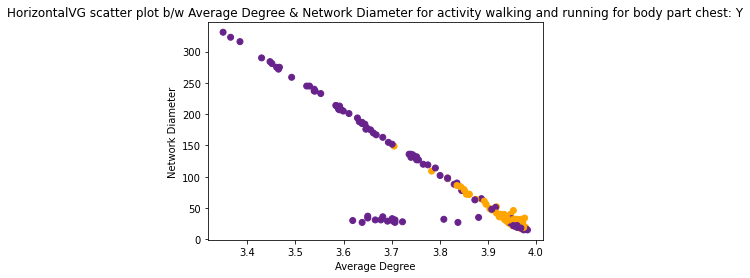

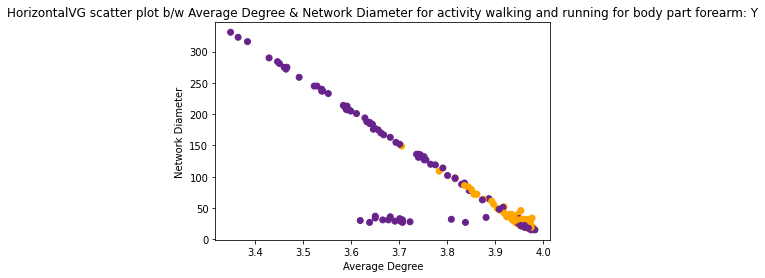

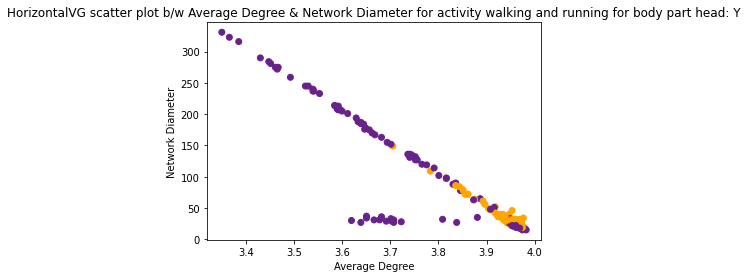

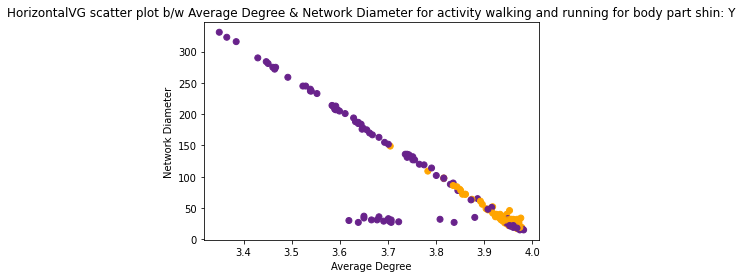

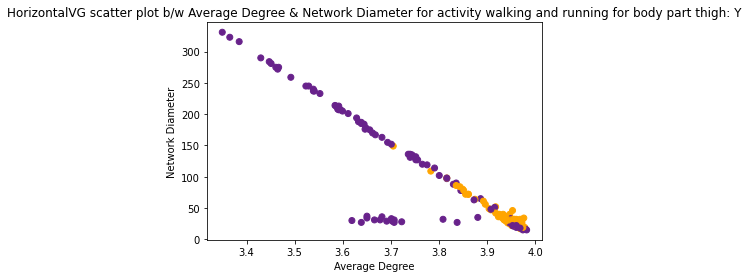

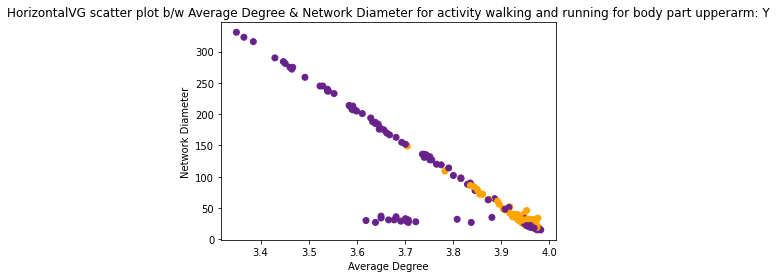

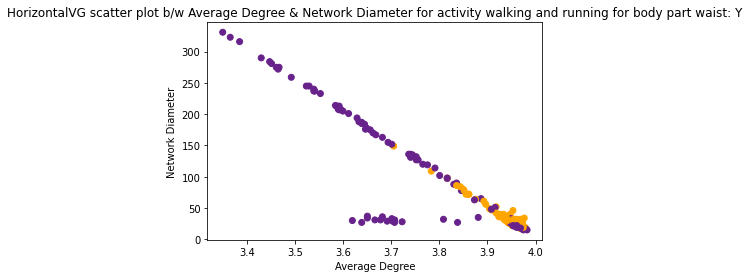

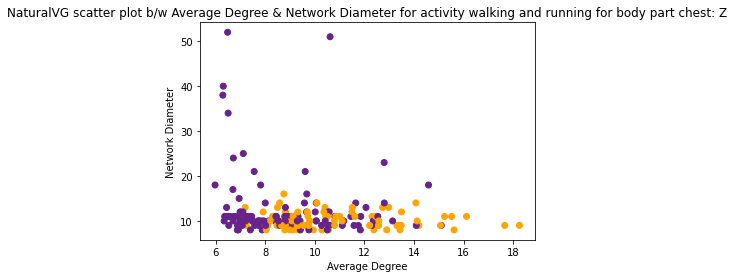

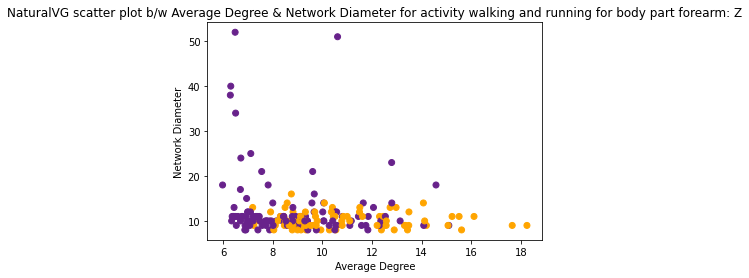

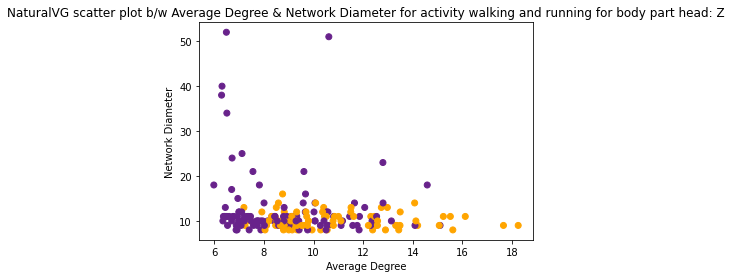

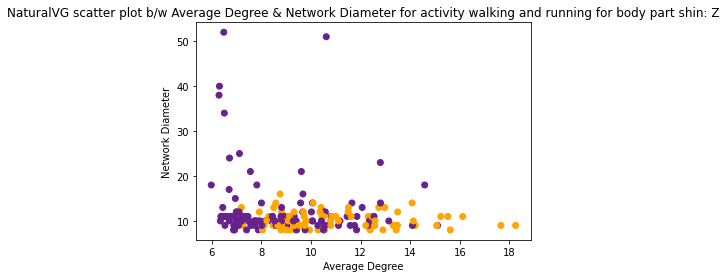

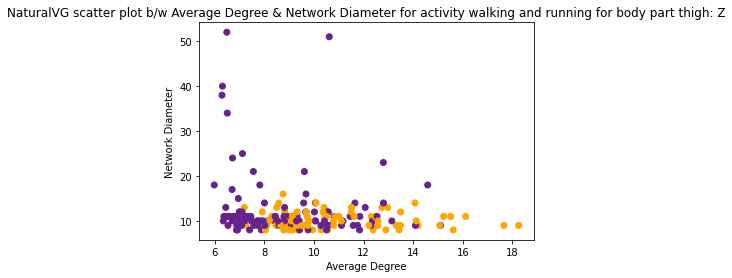

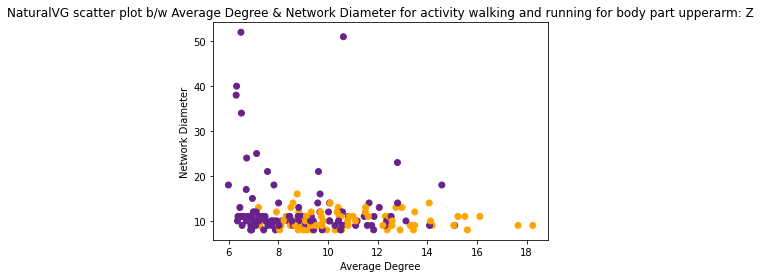

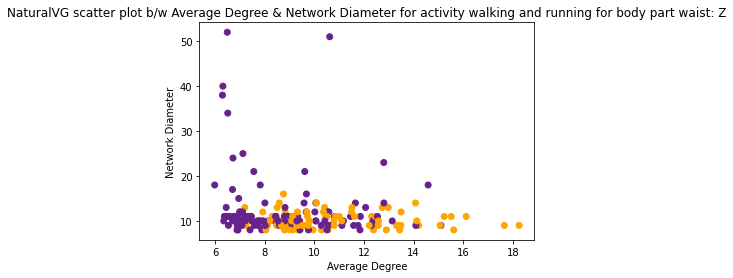

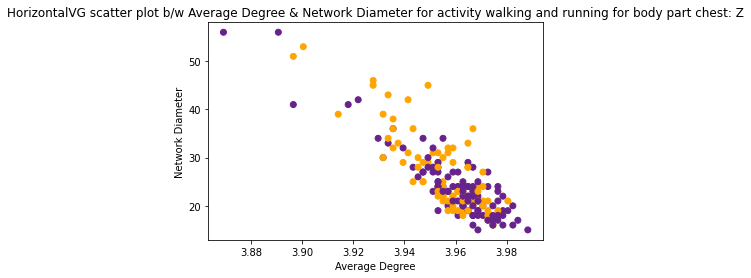

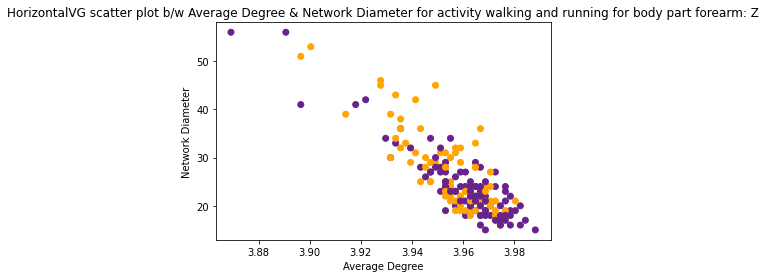

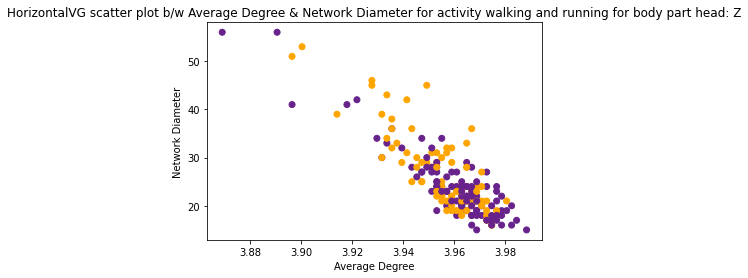

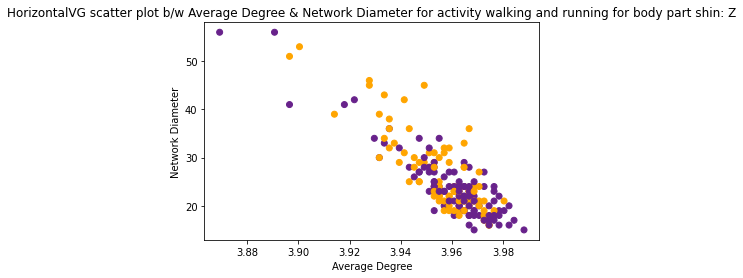

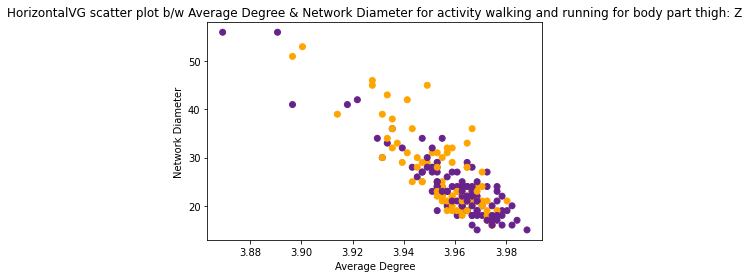

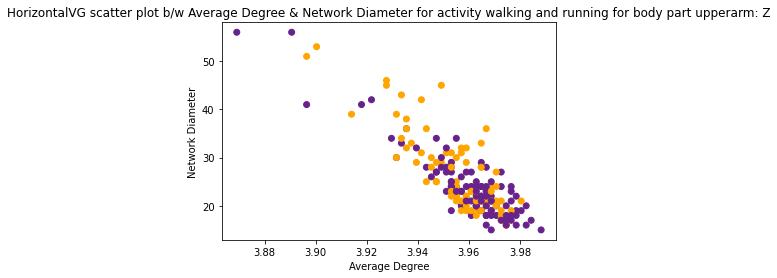

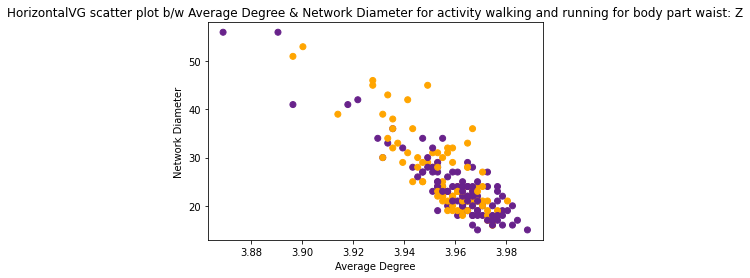

In [11]:
scatter_plot_1 = final_table[(final_table['Activity'] == 'walking') | (final_table['Activity'] == 'running')]
activities = ['walking', 'running' ]
colors = dict(zip(activities, ["orange", "#68228B"]))
axis = list("XYZ")
methods = ["NaturalVG", "HorizontalVG"]
sensors = ["chest","forearm","head","shin","thigh","upperarm","waist"]
for ax in axis:
  for method in methods:
    for sensor in sensors:
      results_scatter1 = scatter_plot_1[(scatter_plot_1['Accelerometer Axis'] == ax) & (scatter_plot_1['Method'] == method) & (scatter_plot_1['Sensor'] == sensor)]
      title =  str(method)+ ' scatter plot b/w Average Degree & Network Diameter for activity walking and running for body part '+str(sensor)+': '+str(ax)
      scatterplot('Average Degree', 'Network Diameter', results_scatter1["Activity"].map(colors), title, results_scatter1)

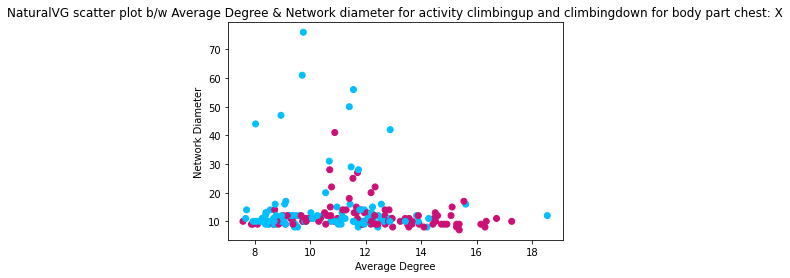

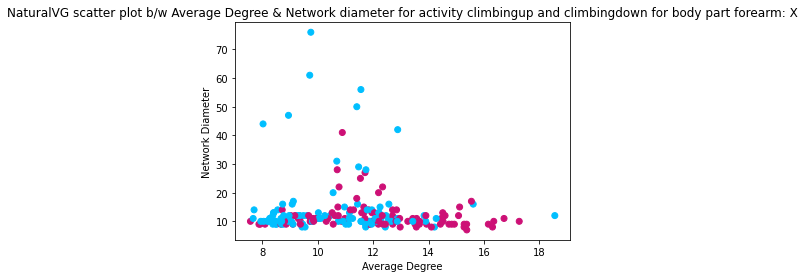

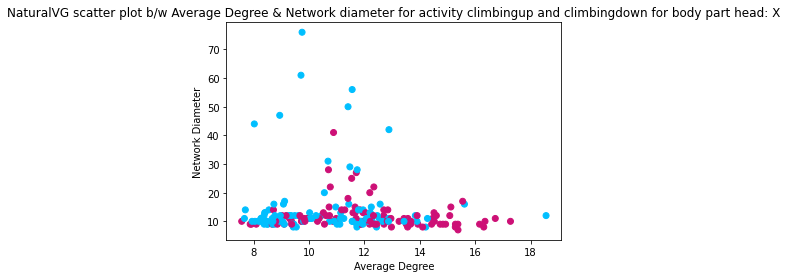

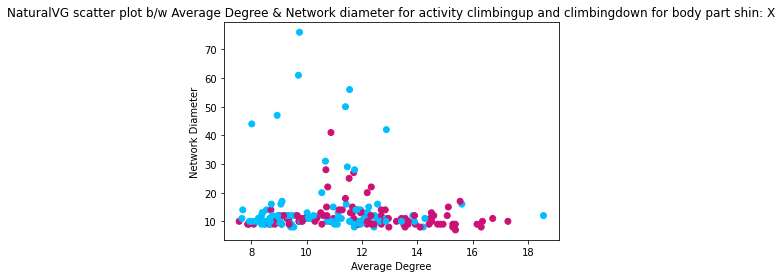

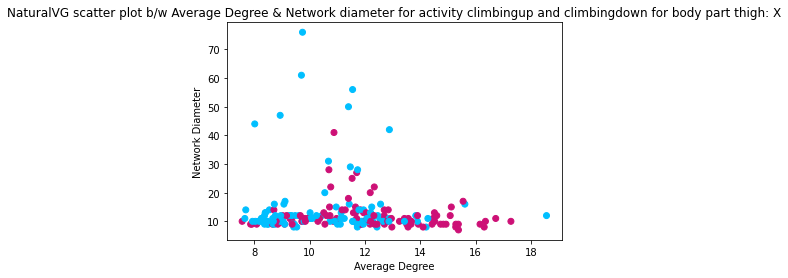

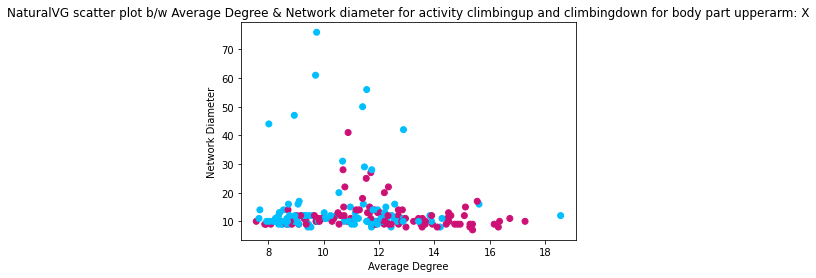

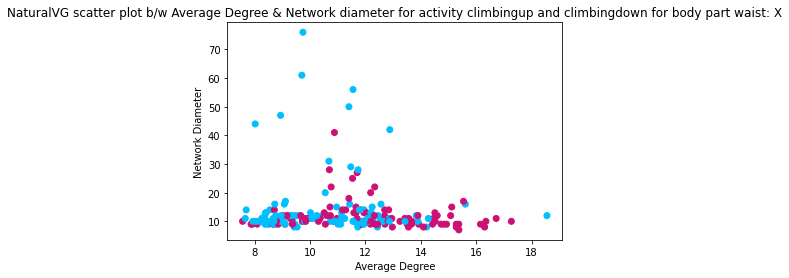

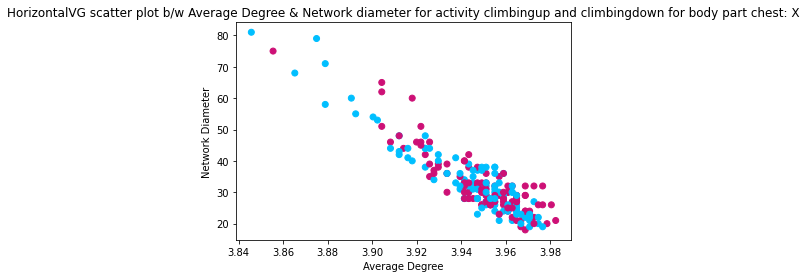

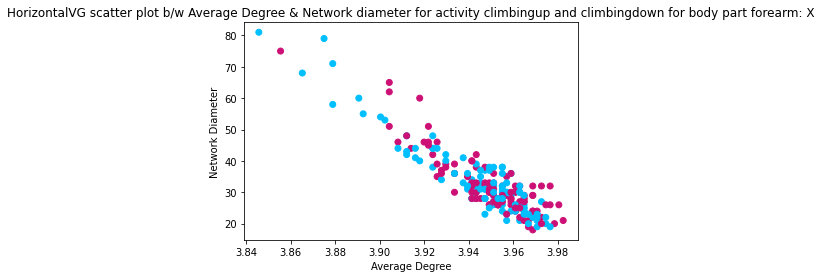

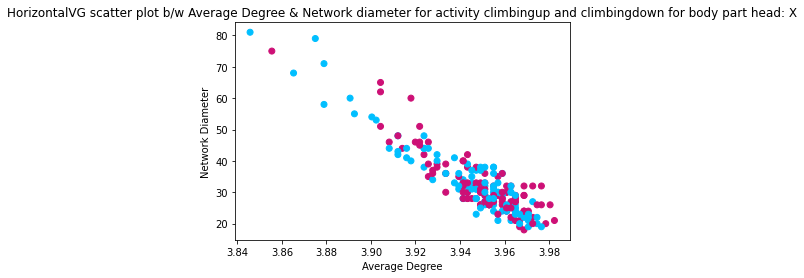

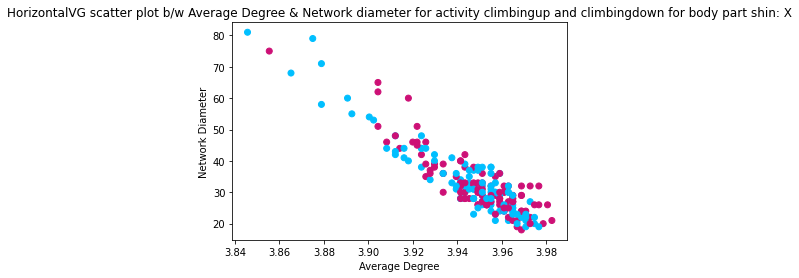

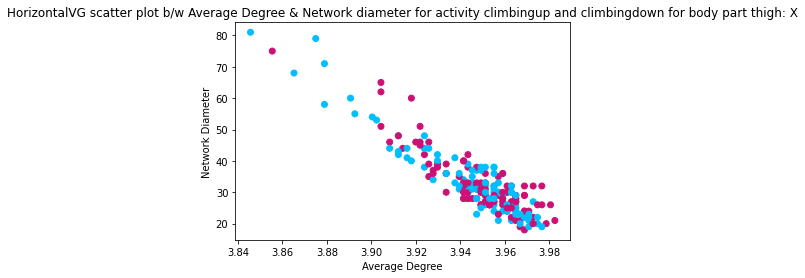

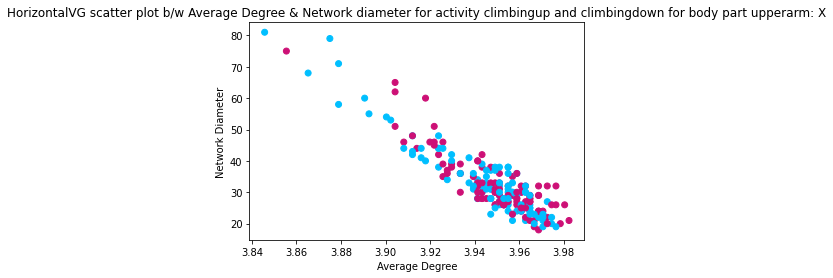

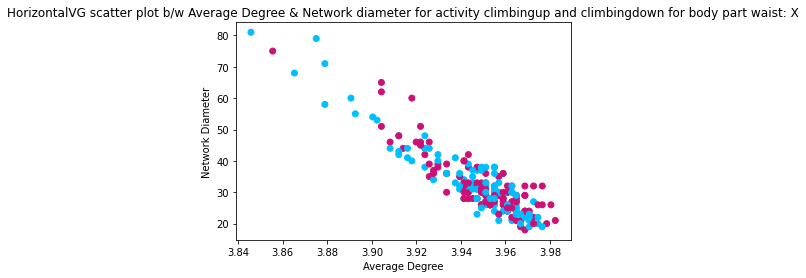

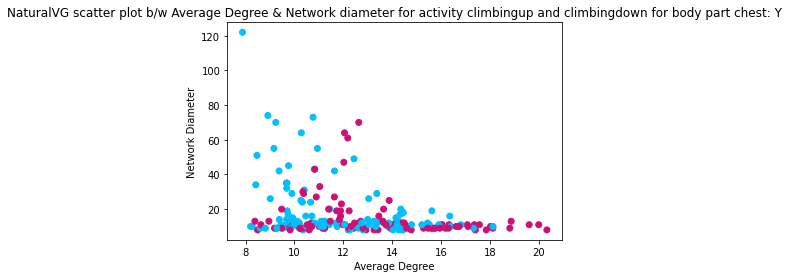

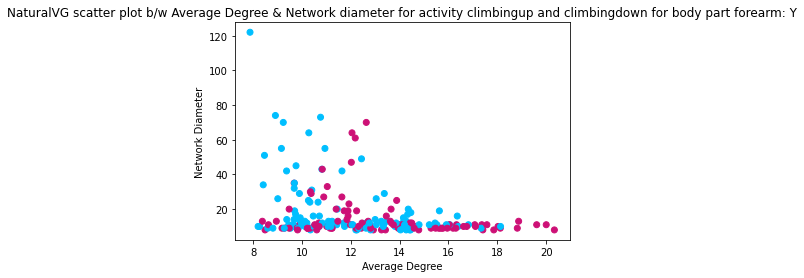

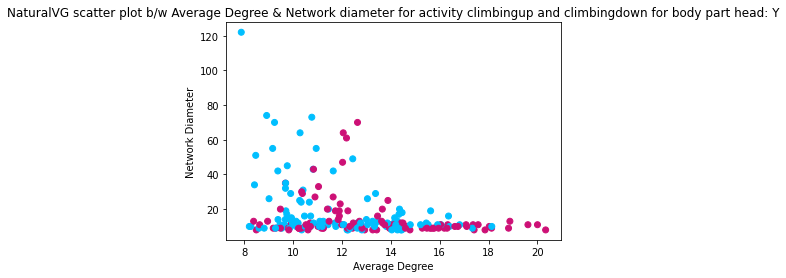

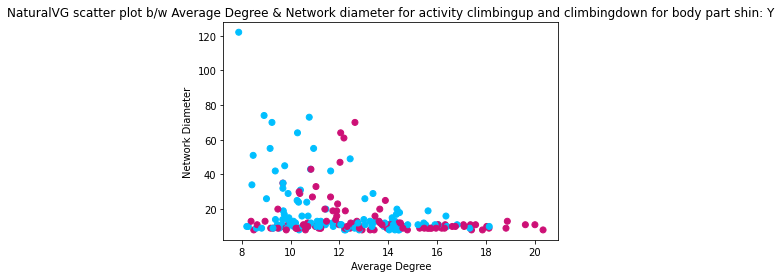

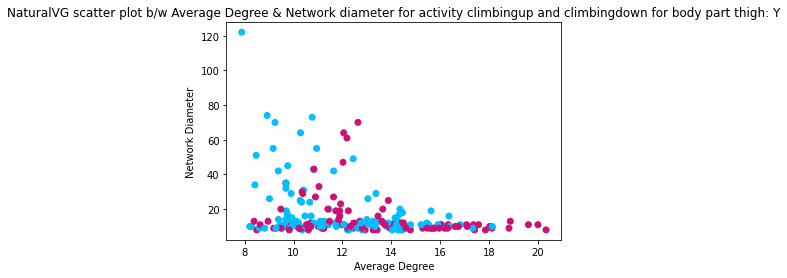

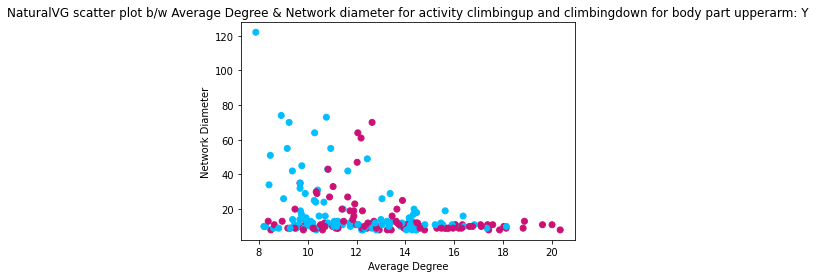

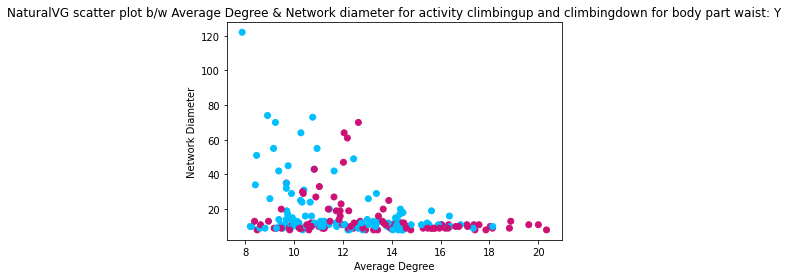

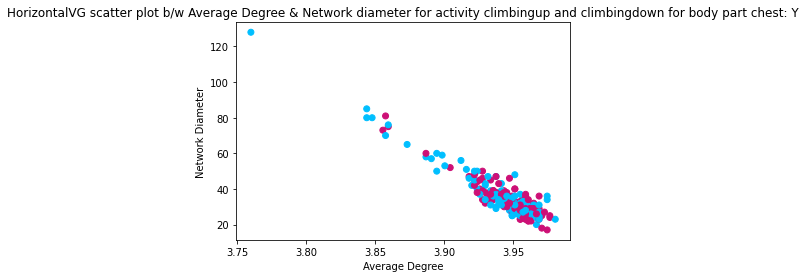

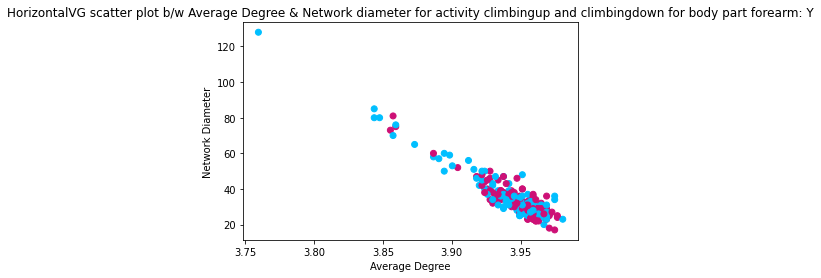

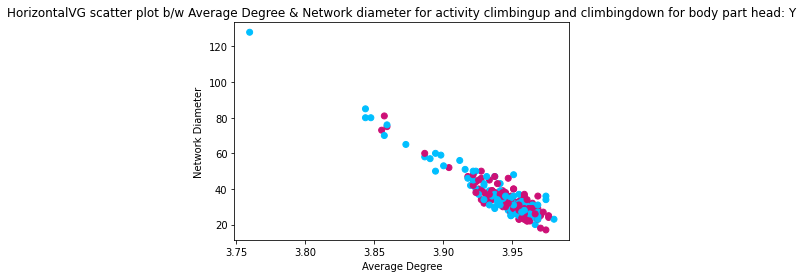

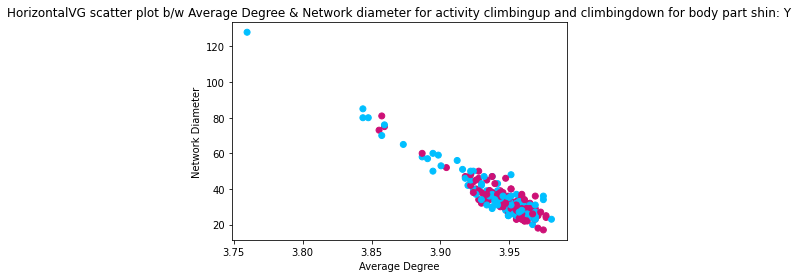

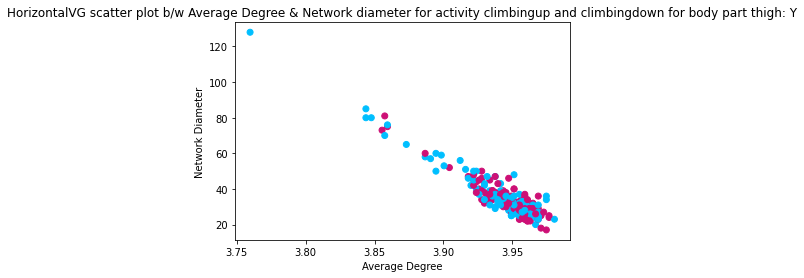

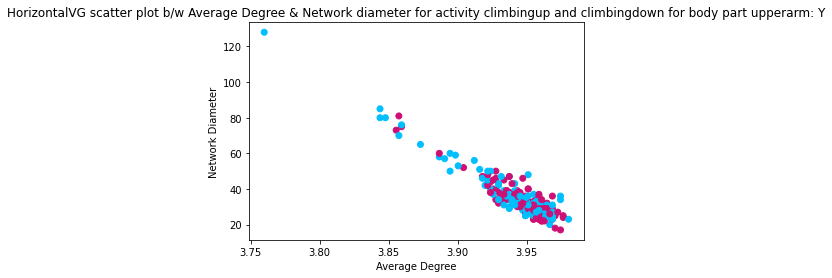

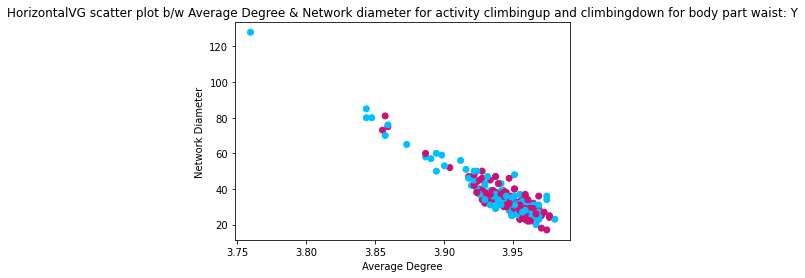

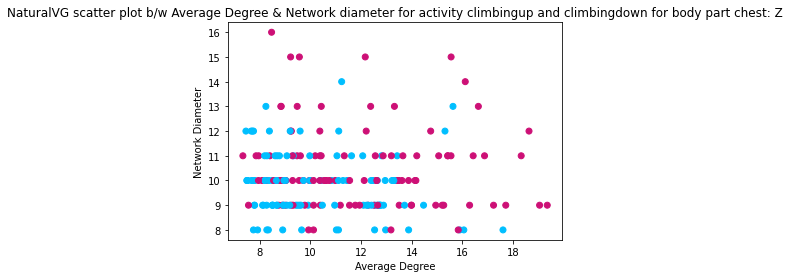

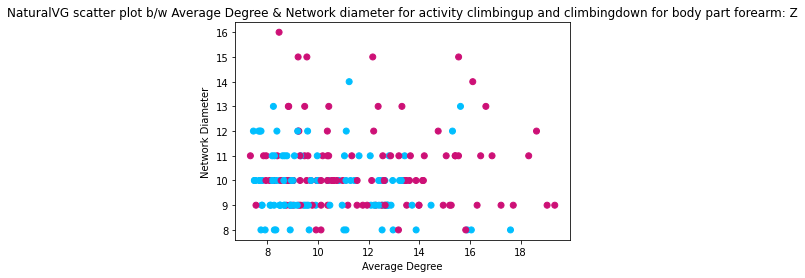

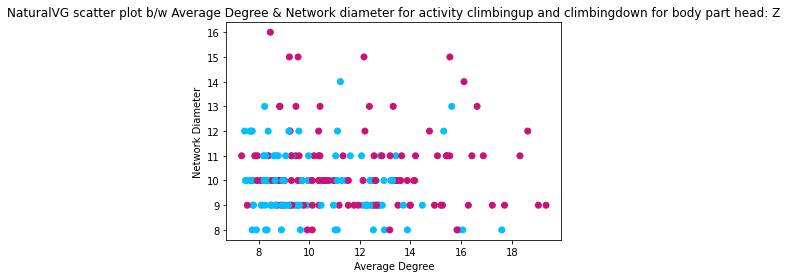

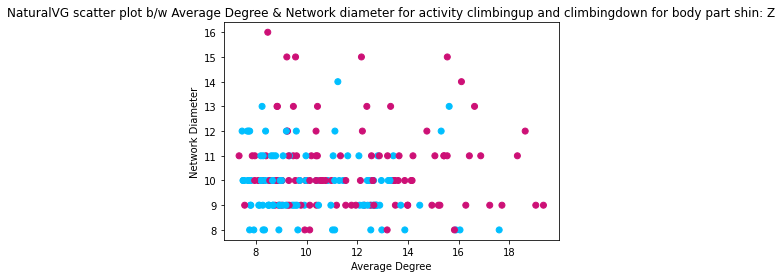

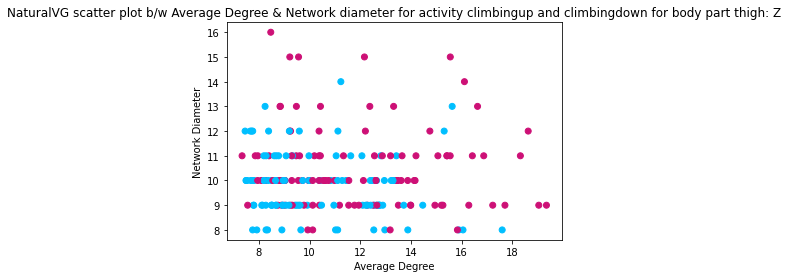

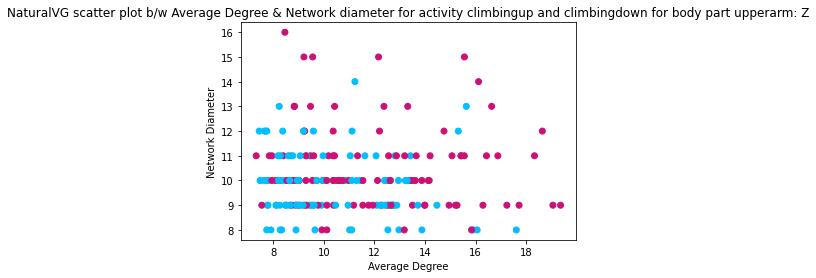

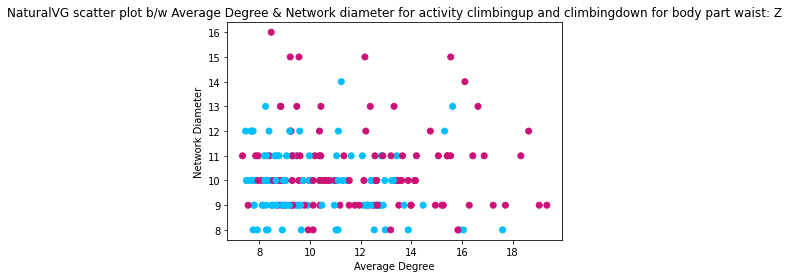

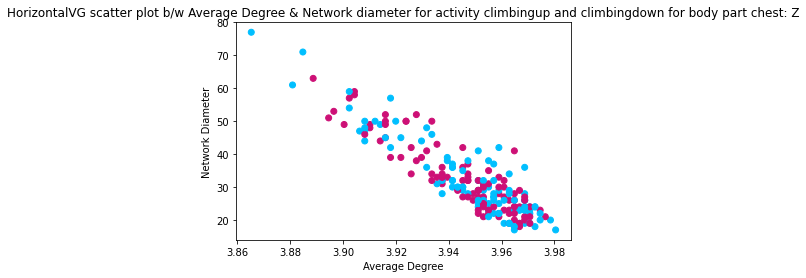

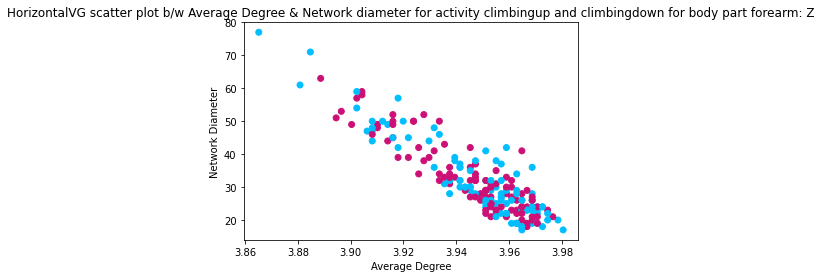

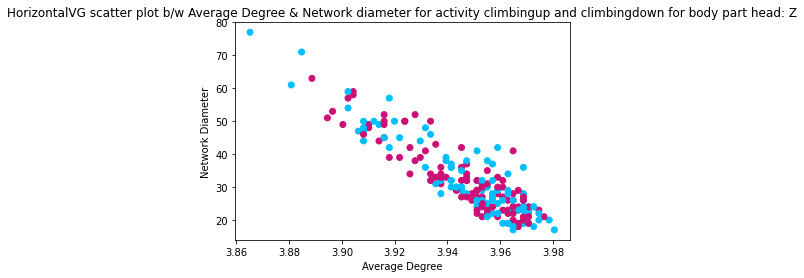

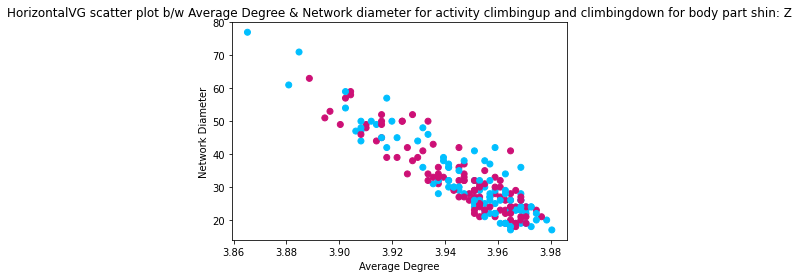

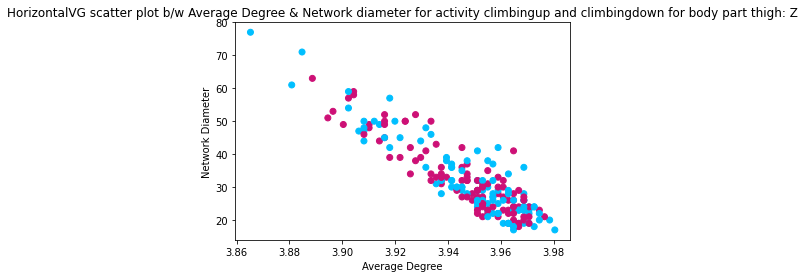

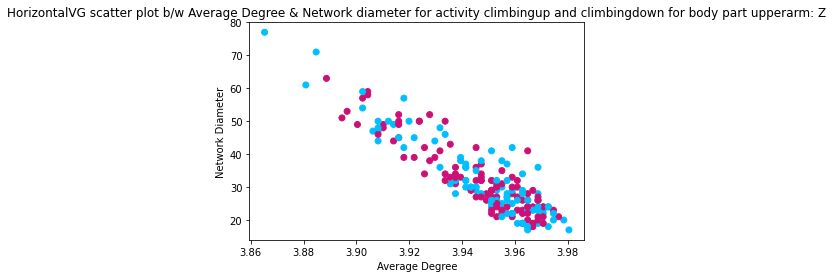

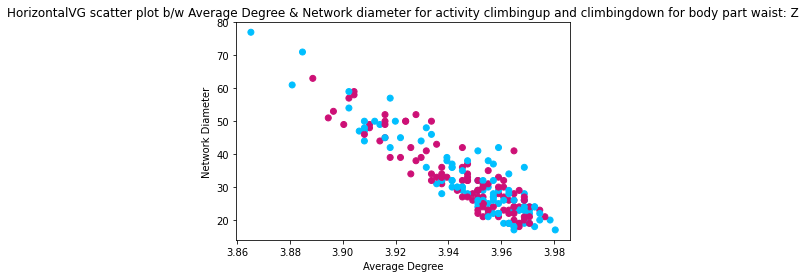

In [12]:
scatter_plot_2 = final_table[(final_table['Activity'] == 'climbingup') | (final_table['Activity'] == 'climbingdown')]
activities = ['climbingup','climbingdown' ]
colors = dict(zip(activities, ["#CD1076", "#00BFFF"]))
axis = list("XYZ")
methods = ["NaturalVG", "HorizontalVG"]
sensors = ["chest","forearm","head","shin","thigh","upperarm","waist"]
for ax in axis:
  for method in methods:
    for sensor in sensors:
      results_scatter = scatter_plot_2[(scatter_plot_2['Accelerometer Axis'] == ax) & (scatter_plot_2['Method'] == method) & (scatter_plot_2['Sensor'] == sensor)]
      title =  str(method)+' scatter plot b/w Average Degree & Network diameter for activity climbingup and climbingdown for body part '+str(sensor)+': '+ str(ax)
      scatterplot('Average Degree', 'Network Diameter', results_scatter["Activity"].map(colors), title, results_scatter)